In [44]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [45]:
model

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [48]:
from keras.datasets import mnist
from keras import backend as K

In [49]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
y_train.shape

(60000,)

Text(0.5, 1.0, '5')

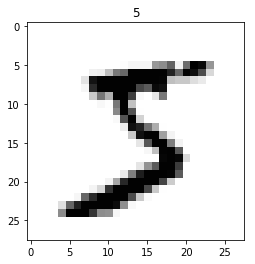

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.imshow(x_train[0][:, :, 0], cmap=cm.get_cmap("Greys"))
plt.title(y_train[0])

In [53]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [54]:
EPOCHS = 10
BATCH_SIZE = 128

In [55]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [56]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [57]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [58]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3959 - accuracy: 0.8896 - val_loss: 0.1322 - val_accuracy: 0.9593
Epoch 2/12
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.0776 - val_accuracy: 0.9744
Epoch 3/12
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0831 - accuracy: 0.9751 - val_loss: 0.0646 - val_accuracy: 0.9789
Epoch 4/12
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0668 - accuracy: 0.9804 - val_loss: 0.0557 - val_accuracy: 0.9822
Epoch 5/12
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.0455 - val_accuracy: 0.9853
Epoch 6/12
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 7/12
60000/60000 [==============================]

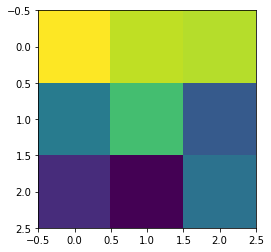

In [65]:
plt.imshow(model.get_weights()[0][:, :, 0, 0])

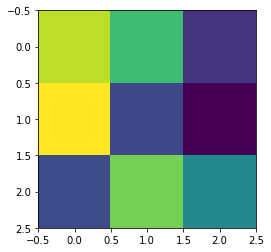

In [66]:
plt.imshow(model.get_weights()[0][:, :, 0, 1])

In [69]:
len(model.get_weights())

10

In [72]:
e = model.layers[0]

In [76]:
e.get_weights()[0]

(3, 3, 1, 6)

In [77]:
e.name

'conv2d_3'

In [82]:
w, b = model.get_layer("conv2d_3").get_weights()

In [86]:
import pandas as pd

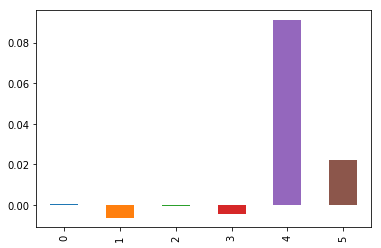

In [89]:
pd.Series(b).plot(kind='bar')

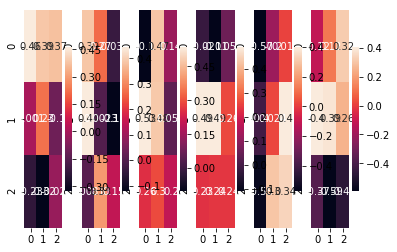

In [94]:
import seaborn as sns
fig, ax = plt.subplots(ncols=6)
for i in range(6):
    sns.heatmap(w[:, :, 0, i], ax=ax[i], annot=True)

In [100]:
import numpy as np
np.argmax(model.predict(x_test[0:1]))

7

Text(0.5, 1.0, 'Predicted = 1, GT = 1')

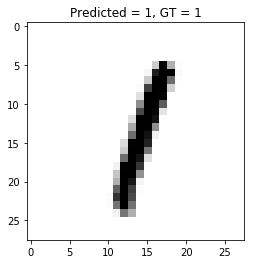

In [121]:
test_sample = 5
plt.imshow(x_test[test_sample][:, :, 0], cmap=cm.get_cmap("Greys"))
pred = np.argmax(model.predict(x_test[test_sample:test_sample+1])[0])
plt.title("Predicted = {}, GT = {}".format(pred, np.argmax(y_test[test_sample])))

In [109]:
np.argmax(model.predict(x_test[0:1])[0])

7

### Figure out which ones we are getting wrong

In [132]:
pred_overall = np.argmax(model.predict(x_test), axis=1)

In [134]:
gt_overall = np.argmax(y_test, axis=1)

In [137]:
np.where(np.not_equal(pred_overall, gt_overall))[0]

array([ 247,  259,  321,  359,  445,  448,  449,  495,  582,  583,  625,
        659,  684,  924,  947,  965, 1014, 1039, 1045, 1062, 1181, 1182,
       1226, 1232, 1247, 1260, 1299, 1319, 1393, 1414, 1530, 1549, 1554,
       1621, 1681, 1901, 1955, 1987, 2035, 2044, 2070, 2098, 2109, 2130,
       2135, 2189, 2293, 2369, 2387, 2406, 2414, 2488, 2597, 2654, 2720,
       2760, 2863, 2896, 2939, 2953, 2995, 3073, 3225, 3422, 3503, 3520,
       3534, 3558, 3559, 3597, 3762, 3767, 3808, 3869, 3985, 4007, 4065,
       4075, 4193, 4207, 4248, 4306, 4405, 4500, 4571, 4639, 4699, 4723,
       4740, 4761, 4807, 4823, 5228, 5265, 5937, 5955, 5973, 6555, 6560,
       6597, 6614, 6625, 6651, 6755, 6847, 7259, 7851, 7921, 8059, 8069,
       8311, 8325, 8408, 9009, 9587, 9629, 9634, 9679, 9729])

In [133]:
pred_overall

array([7, 2, 1, ..., 4, 5, 6])

In [139]:
def plot_prediction(test_sample):
    plt.imshow(x_test[test_sample][:, :, 0], cmap=cm.get_cmap("Greys"))
    pred = np.argmax(model.predict(x_test[test_sample:test_sample+1])[0])
    plt.title("Predicted = {}, GT = {}".format(pred, np.argmax(y_test[test_sample])))

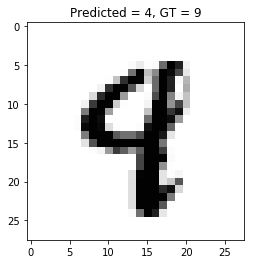

In [140]:
plot_prediction(359)

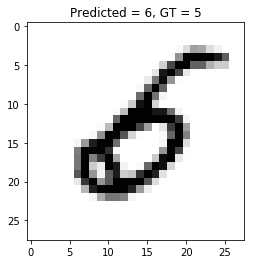

In [141]:
plot_prediction(9729)

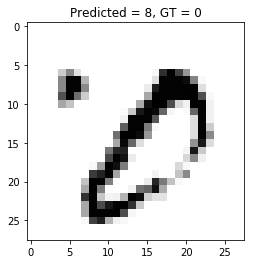

In [142]:
plot_prediction(9634)

In [143]:
### Feature map

In [172]:
fm_model = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)

In [173]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [174]:
fm_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________


In [175]:
fm_model.predict(x_test[test_sample:test_sample+1]).shape

(1, 11, 11, 16)

In [185]:
test_sample = 88
fm_1 = fm_model.predict(x_test[test_sample:test_sample+1])[0, :, :, :]

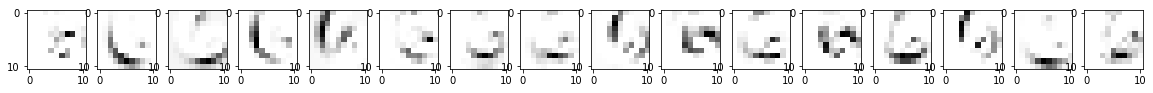

In [186]:
fig, ax = plt.subplots(ncols=16, figsize=(20, 4))
for i in range(16):
    ax[i].imshow(fm_1[:, :, i], cmap="Greys")